<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/Prophet_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install prophet


In [7]:
import pandas as pd
from prophet import Prophet

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0)
#df.index.freq = 'MS'
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## **Format the Data**

In [9]:
df.columns = ['ds', 'y']

In [10]:
df['ds'] = pd.to_datetime(df['ds'])

## **Create and Fit Model**

In [ ]:
help(Prophet)

In [11]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnkkgx5kb/unk_htmk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnkkgx5kb/v377ig6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86514', 'data', 'file=/tmp/tmpnkkgx5kb/unk_htmk.json', 'init=/tmp/tmpnkkgx5kb/v377ig6c.json', 'output', 'file=/tmp/tmpnkkgx5kb/prophet_modeljyl53xmb/prophet_model-20240827095019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:50:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:50:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## **Forecasting**

In [13]:
future = m.make_future_dataframe(periods=24, freq='MS')

In [14]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [15]:
future.tail()

,ds
163,1962-08-01
164,1962-09-01
165,1962-10-01
166,1962-11-01
167,1962-12-01


In [16]:
len(df)

144

In [17]:
len(future)

168

## **Predict and fill in the future**

In [18]:
forecast = m.predict(future)

In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,57.165249,115.042255,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,48.825245,107.699219,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,80.284169,138.761705,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,80.673270,137.383461,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,83.561038,141.669634,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281


In [20]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
163,1962-08-01,546.256871,587.748373,644.154066,544.919956,547.571288,67.906679,67.906679,67.906679,67.906679,67.906679,67.906679,0.0,0.0,0.0,614.163550
164,1962-09-01,549.388521,537.990494,593.681749,547.889788,550.792770,16.861931,16.861931,16.861931,16.861931,16.861931,16.861931,0.0,0.0,0.0,566.250452
165,1962-10-01,552.419149,502.364984,558.057697,550.792081,553.936129,-21.864380,-21.864380,-21.864380,-21.864380,-21.864380,-21.864380,0.0,0.0,0.0,530.554769
166,1962-11-01,555.550798,468.021291,523.858488,553.771755,557.192476,-57.836310,-57.836310,-57.836310,-57.836310,-57.836310,-57.836310,0.0,0.0,0.0,497.714488
167,1962-12-01,558.581426,498.749115,557.615793,556.721933,560.333526,-31.342368,-31.342368,-31.342368,-31.342368,-31.342368,-31.342368,0.0,0.0,0.0,527.239058


In [21]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [22]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
156,1962-01-01,502.424852,472.850336,531.825238
157,1962-02-01,496.318274,468.104340,523.865258
158,1962-03-01,531.956124,503.104956,559.651215
159,1962-04-01,528.073113,499.968351,555.685851
160,1962-05-01,534.163280,502.696837,561.659709
161,1962-06-01,573.604104,545.441015,601.991630
162,1962-07-01,614.210779,584.613440,645.248759
163,1962-08-01,614.163550,587.748373,644.154066
164,1962-09-01,566.250452,537.990494,593.681749
165,1962-10-01,530.554769,502.364984,558.057697




### Plotting Forecast

We can use Prophet's own built in plotting tools

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


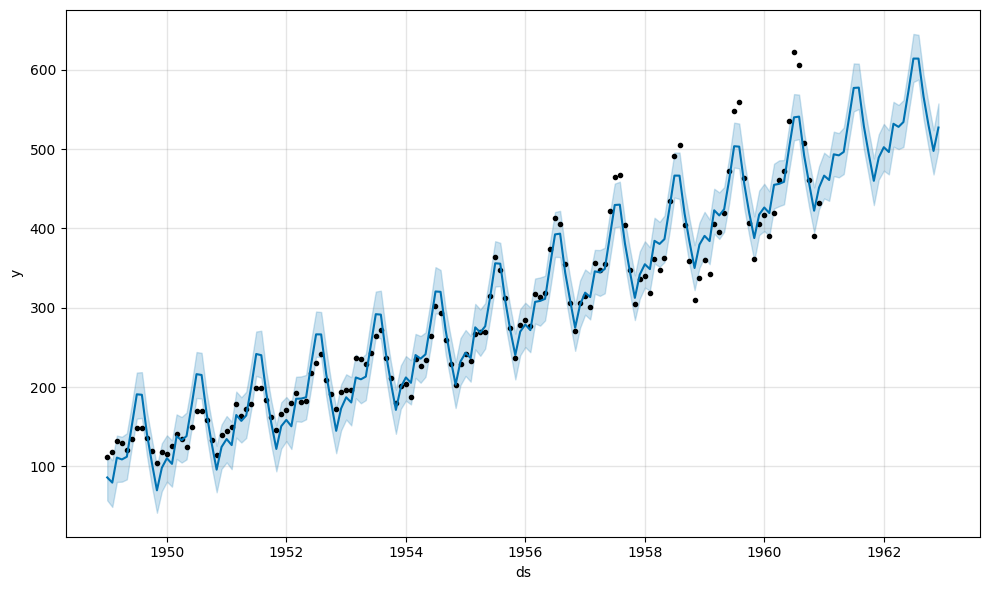

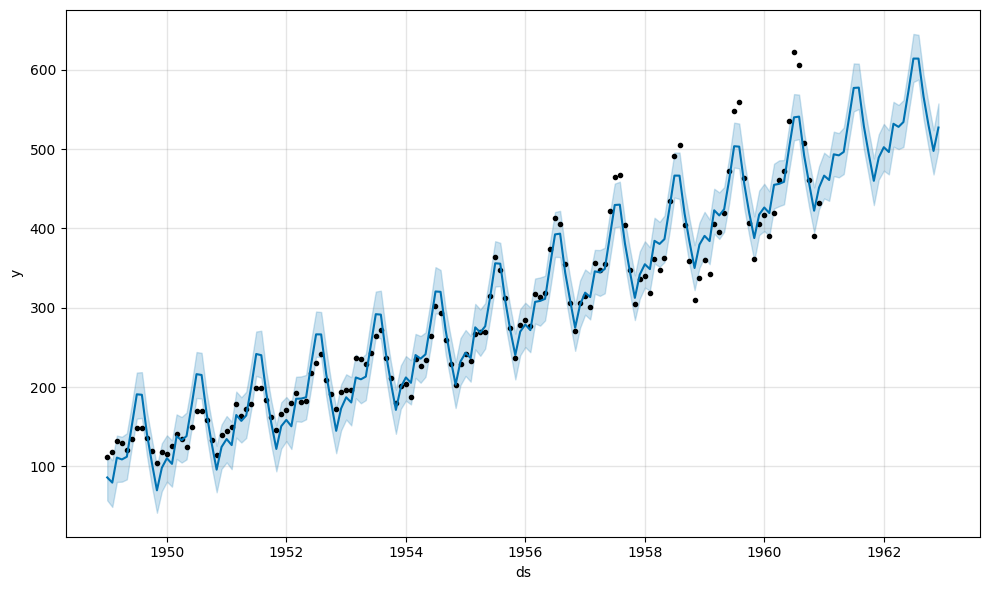

In [23]:
m.plot(forecast)

ConversionError: Failed to convert value(s) to axis units: '1958-01-01'

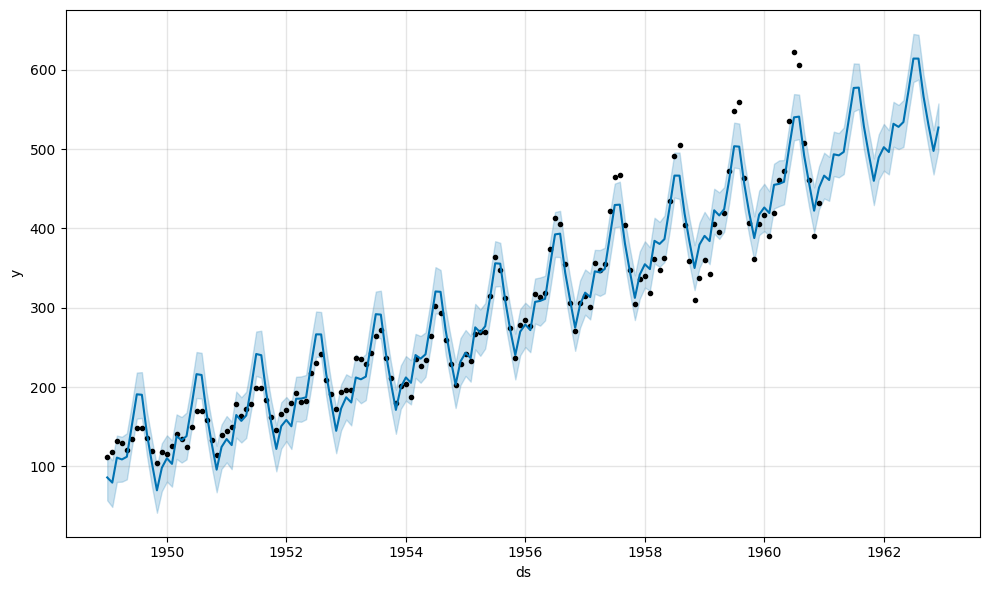

In [25]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim(('1958-01-01', '1962-01-01'))

<Axes: xlabel='ds'>

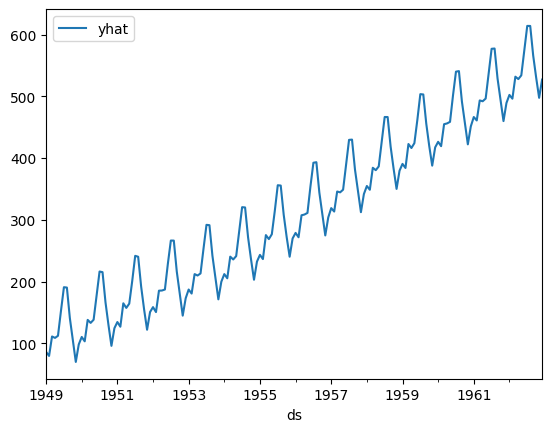

In [26]:
forecast.plot(x='ds', y='yhat')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

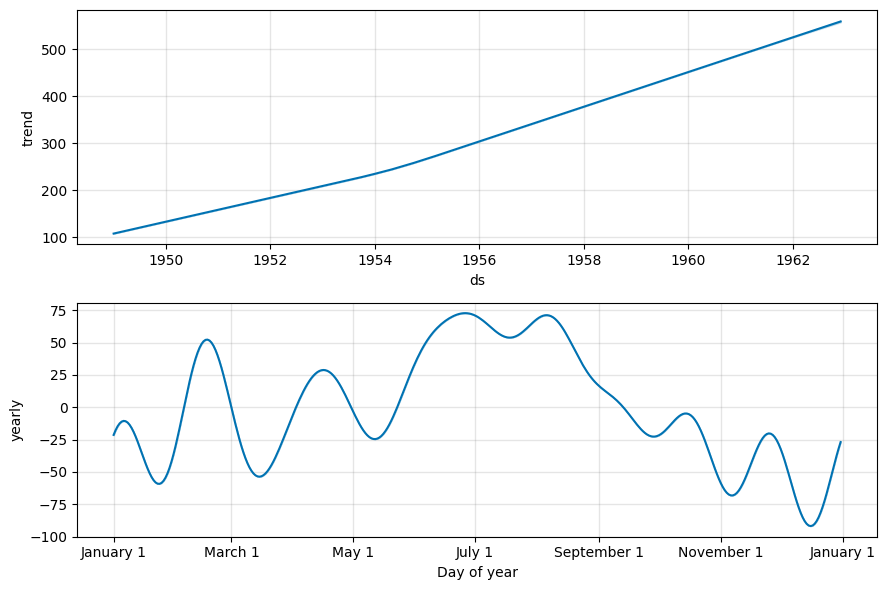

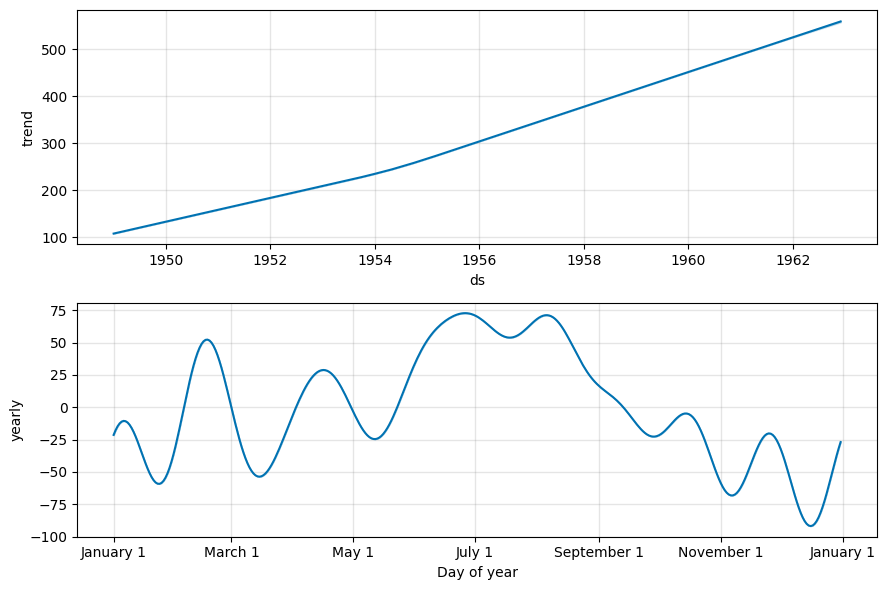

In [27]:
m.plot_components(forecast)